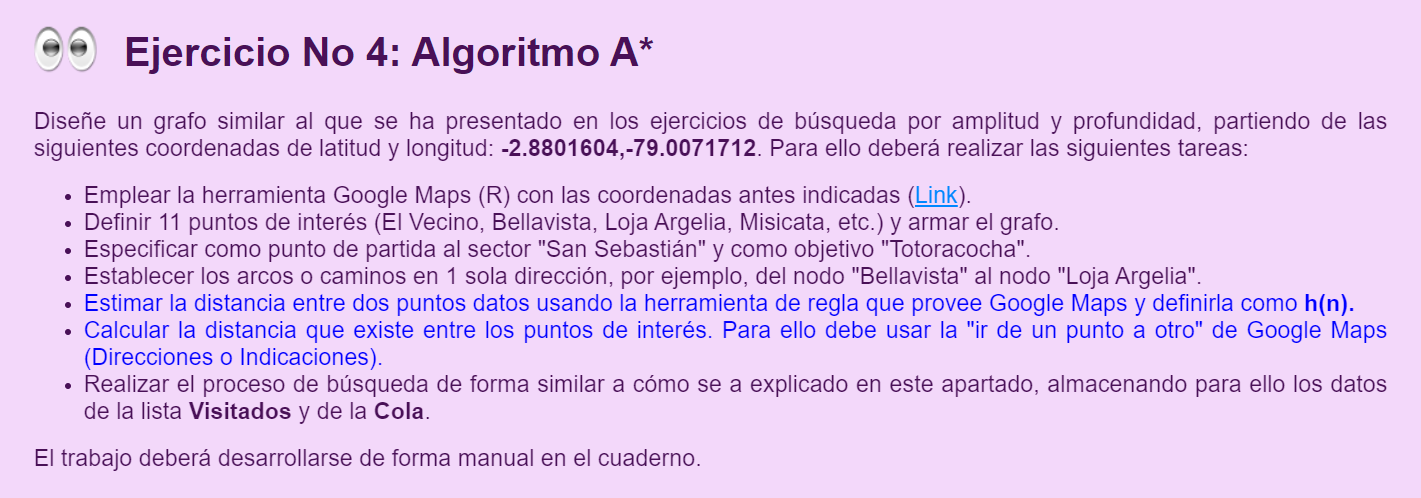

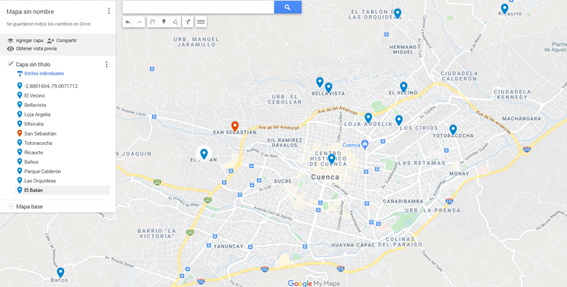

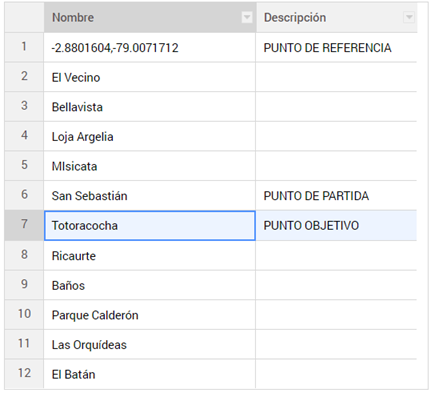

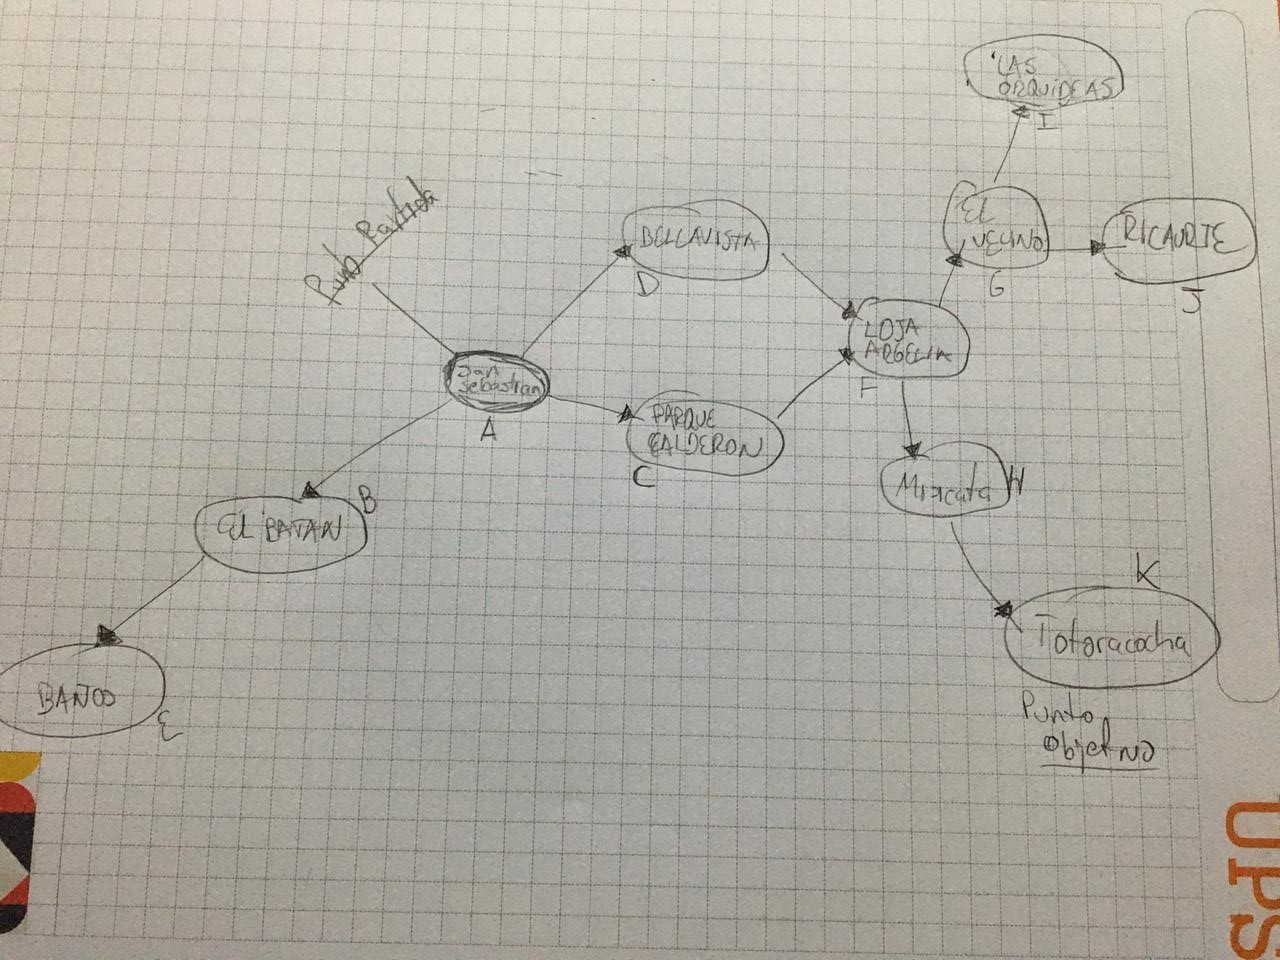


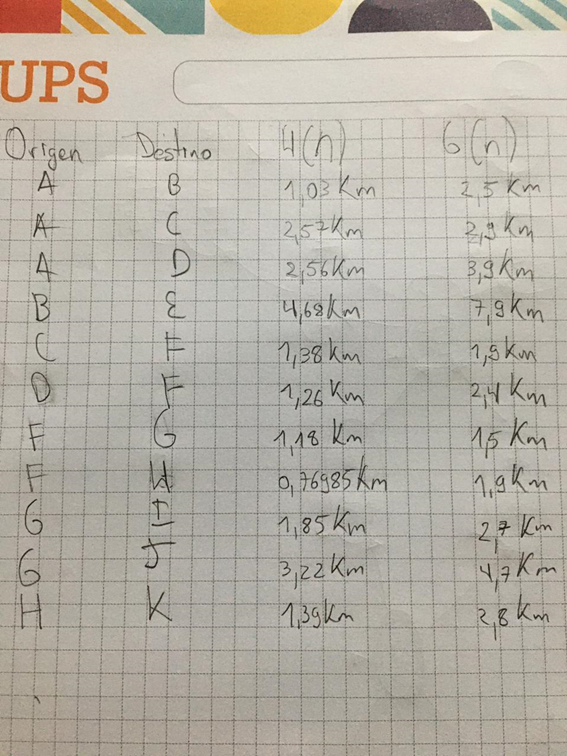


In [1]:
from neo4j import GraphDatabase

In [2]:
#CLASE PAR CREAR NODO CENTRAR-PARQUE CENTRAL
class CLASE_NEO4J(object): 
    def __init__(self):
        self._driver = GraphDatabase.driver("bolt:neo4j://localhost:7687", auth=("neo4j", "neo4jj"), encrypted=False)
    def close(self):
        self._driver.close()
    def CREAR_LUGAR(self, message,lugar, latitud, longitud):
        with self._driver.session() as session:
            greeting = session.write_transaction(self._VALIDAR_LUGAR, message,lugar, latitud, longitud)
            print(greeting)
    def CREAR_RUTA(self,origen,destino,costo,hn):
        with self._driver.session() as session:
            greeting2 = session.write_transaction(self._VALIDAR_RUTA,origen,destino,costo,hn)
            print(greeting2) 
    #METODO PARA CREAR LOS NODOS DE LUGARES
    @staticmethod
    def _VALIDAR_LUGAR(tx, message,lugar, latitud, longitud):
        #SE BUSCA SI EL LUGAR DEL ARREGLO EXISTE EN LA BASE NEO4J
        result2 = tx.run("match(l:Lugares {nombre:'"+lugar+"'}) return l.nombre").data()
        #CONDICION PARA VERIFICAR SI EXISTE
        if int(len(result2)) == 0:
            print("SE CREA EL LUGAR EN LA BASE..........")
            #SE CREA NODO LUGAR
            result = tx.run("CREATE("+lugar+":Lugares {nombre:'"+lugar+"' ,latitud: "+latitud+", longitud: "+longitud+"}) "
                        "SET "+lugar+".message = $message "
                        "RETURN "+lugar+".message + ', from node ' + id("+lugar+")", message=message)
        elif int(len(result2))  == 1:
            print("EL NODO LUGAR YA EXISTE, INGRESAR OTRO LUGAR........")
    #METODO PARA CREAR LAS RELACIONES CON EL COSTE  Y HN PARA LA RUTA
    @staticmethod
    def _VALIDAR_RUTA(tx,origen,destino,costo,hn):
        #SE BUSCA SI LA RUTA A CREAR YA DEL ARREGLO EXISTE EN LA BASE NEO4J
        result = tx.run("match(l1:Lugares{nombre:'"+origen+"'})-[r:RUTA_DE{costo:"+costo+",hn:"+hn+"}]->(l2:Lugares{nombre:'"+destino+"'}) return l2").data()
        if int(len(result)) == 0:
            print("SE CREA LOS NODOS DE RELACION DE RUTAS ENTRE LOS LUGARES ................")
            result2 = tx.run(" match("+origen+":Lugares {nombre:'"+origen+"'}) match("+destino+":Lugares {nombre:'"+destino+"'}) create("+origen+")-[:RUTA_DE{costo:"+costo+",hn:"+hn+"}]->("+destino+")")
        elif int(len(result)) == 1:
            print("YA EXISTE LA RUTA**********")
# MATCH (n) OPTIONAL MATCH (n)-[r]-() DELETE n,r
#SE INICIALIZA LA CLASE DE LOS METODOS DE NEO4J
grafo=CLASE_NEO4J()

In [3]:
#SE CREA LA LISTA DE NODOS LUGARES 
listaL = (["El_Vecino", -2.88112, -78.9882], 
          ["Bellavista", -2.88129, -79.00516], 
          ["Loja_Argelia", -2.88817, -78.99612], 
          ["Misicata", -2.88866, -78.98923], 
          ["San_Sebastian", -2.89008, -79.02636], 
          ["Totoracocha", -2.89082, -78.97689], 
          ["Ricaurte", -2.86347, -78.96523], 
          ["Baños", -2.92317, -79.06591], 
          ["Parque_Calderon", -2.89741, -79.00448], 
          ["Las_Orquideas", -2.86452, -78.98954], 
          ["El_Batan", -2.89628, -79.03342])
cont = 0
for ll in listaL:
    #SE INICIA EL METODO DE GENERAR NODOS LUGARES
    grafo.CREAR_LUGAR("SE GENERA UN NODO LUGAR EN LA BASE >>>>>>>>> ",str(ll[0]), str(ll[1]), str(ll[2]))
    cont+=1
    print(cont)

SE CREA EL LUGAR EN LA BASE..........
None
1
SE CREA EL LUGAR EN LA BASE..........
None
2
SE CREA EL LUGAR EN LA BASE..........
None
3
SE CREA EL LUGAR EN LA BASE..........
None
4
SE CREA EL LUGAR EN LA BASE..........
None
5
SE CREA EL LUGAR EN LA BASE..........
None
6
SE CREA EL LUGAR EN LA BASE..........
None
7
SE CREA EL LUGAR EN LA BASE..........
None
8
SE CREA EL LUGAR EN LA BASE..........
None
9
SE CREA EL LUGAR EN LA BASE..........
None
10
SE CREA EL LUGAR EN LA BASE..........
None
11


In [4]:
# SE GENERA LAS RELACIONES DE LOS LUGARES
#SE CREA LA LISTA DE LAS RELACIONES Y LOS NODOS
listaL = (["San_Sebastian", "El_Batan", 1.03, 2.5],
          ["San_Sebastian", "Parque_Calderon", 2.57, 2.9],
          ["San_Sebastian", "Bellavista", 2.56, 3.9],
          ["El_Batan", "Baños", 4.68, 7.9],
          ["Parque_Calderon", "Loja_Argelia", 1.38, 1.9],
          ["Bellavista", "Loja_Argelia", 1.26, 2.4],
          ["Loja_Argelia", "El_Vecino", 1.18, 1.5],
          ["Loja_Argelia", "Misicata", 0.76985, 1.9],
          ["El_Vecino", "Las_Orquideas", 1.85, 2.7],
          ["El_Vecino", "Ricaurte", 3.22, 4.7],
          ["Misicata", "Totoracocha", 1.39, 2.8])
         
for ll in listaL:
    #SE INICIA EL METODO DE GENERAR NODOS LUGARES
    grafo.CREAR_RUTA(str(ll[0]),str(ll[1]),str(ll[2]),str(ll[3]))

SE CREA LOS NODOS DE RELACION DE RUTAS ENTRE LOS LUGARES ................
None
SE CREA LOS NODOS DE RELACION DE RUTAS ENTRE LOS LUGARES ................
None
SE CREA LOS NODOS DE RELACION DE RUTAS ENTRE LOS LUGARES ................
None
SE CREA LOS NODOS DE RELACION DE RUTAS ENTRE LOS LUGARES ................
None
SE CREA LOS NODOS DE RELACION DE RUTAS ENTRE LOS LUGARES ................
None
SE CREA LOS NODOS DE RELACION DE RUTAS ENTRE LOS LUGARES ................
None
SE CREA LOS NODOS DE RELACION DE RUTAS ENTRE LOS LUGARES ................
None
SE CREA LOS NODOS DE RELACION DE RUTAS ENTRE LOS LUGARES ................
None
SE CREA LOS NODOS DE RELACION DE RUTAS ENTRE LOS LUGARES ................
None
SE CREA LOS NODOS DE RELACION DE RUTAS ENTRE LOS LUGARES ................
None
SE CREA LOS NODOS DE RELACION DE RUTAS ENTRE LOS LUGARES ................
None


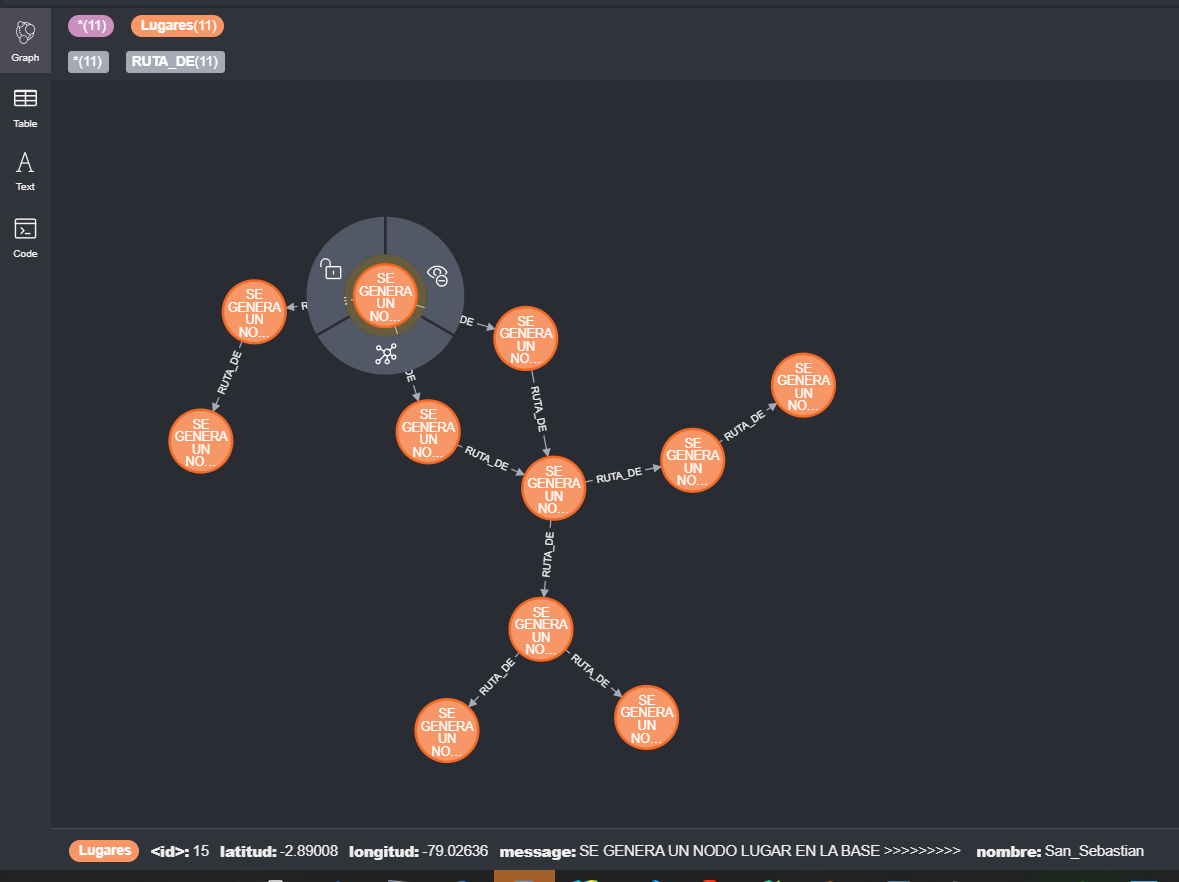

MATCH (start:Lugares{name:"King's Cross St. Pancras"}),(end:Lugares{name:"Kentish Town"})
CALL algo.shortestPath.astar.stream(start, end, 'costo', 'latitud', 'longitud', {defaultValue:1.0})
YIELD nodeId, cost
RETURN algo.asNode(nodeId).nombre as station,cost

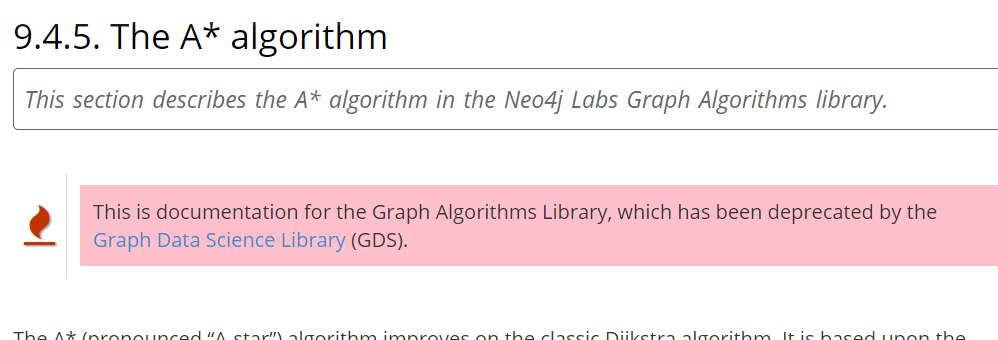